In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D, Dropout
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define the paths to your image and csv folders
train_val_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val"
validation_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val"

test_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\test"
train_path_labels = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [3]:
# load training dataset in numpy array

images = []
labels = []

for filename in os.listdir(train_val_dir): 
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
        
#       img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')                  
y_train = np.load('y_train.npy')    

In [4]:
x_train.shape

(1000, 128, 128, 3)

In [5]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
# load test dataset in numpy array

images = []
labels = []

for filename in os.listdir(test_dir): 
    if filename.endswith('.png'): 
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
#       img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')                  
y_test = np.load('y_test.npy')    

In [7]:
x_test.shape

(50, 128, 128, 3)

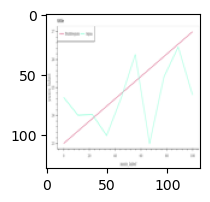

In [8]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [9]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
y_train.shape
y_test.shape

(50,)

In [10]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample

def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
#   image_label = train_val_labels.iloc[index]['type']
#   plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

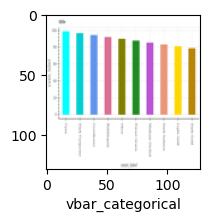

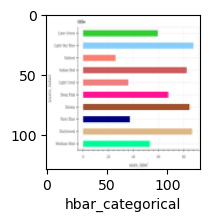

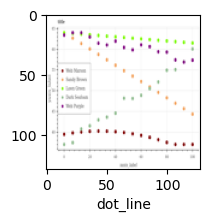

In [11]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,999)

In [12]:
# now we have mapped the corresponding labels to the image

In [13]:
# normalize the image

# x_train[0]/255

x_train=x_train /255
x_test=x_train /255

In [14]:
x_test.shape

(1000, 128, 128, 3)

In [15]:
# take the label for train data from csv file

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [16]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [17]:
# writing a simple nn to test first

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)), 
#   Flatten(input_shape=(128,128)),  Got 0.4 accuracy on testing on grayscale images
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 18s 528ms/step - loss: 6.4266 - accuracy: 0.2120
Epoch 2/10
32/32 [==============================] - 16s 487ms/step - loss: 1.6271 - accuracy: 0.2180
Epoch 3/10
32/32 [==============================] - 15s 482ms/step - loss: 1.6072 - accuracy: 0.2270
Epoch 4/10
32/32 [==============================] - 15s 476ms/step - loss: 1.6053 - accuracy: 0.2200
Epoch 5/10
32/32 [==============================] - 15s 472ms/step - loss: 1.5893 - accuracy: 0.2550
Epoch 6/10
32/32 [==============================] - 15s 482ms/step - loss: 1.5812 - accuracy: 0.2740
Epoch 7/10
32/32 [==============================] - 16s 486ms/step - loss: 1.5732 - accuracy: 0.2560
Epoch 8/10
32/32 [==============================] - 15s 479ms/step - loss: 1.5873 - accuracy: 0.2600
Epoch 9/10
32/32 [==============================] - 15s 480ms/step - loss: 1.5912 - accuracy: 0.2170
Epoch 10/10
32/32 [==============================] - 15s 479ms/step - loss: 1.5642 - accura

In [70]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [71]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 187ms/step - loss: 1.6129 - accuracy: 0.1719


[1.6128865480422974, 0.171875]

In [20]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 117ms/step


In [21]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [22]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape) 

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 1.6129 - accuracy: 0.2175 - val_loss: 1.7989 - val_accuracy: 0.1900
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 1.7340 - accuracy: 0.2025 - val_loss: 1.5751 - val_accuracy: 0.2400
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.5732 - accuracy: 0.2237 - val_loss: 1.5501 - val_accuracy: 0.2650
Epoch 4/50
1/1 [==============================] - 11s 11s/step - loss: 1.5483 - accuracy: 0.2463 - val_loss: 1.5184 - val_accuracy: 0.4650
Epoch 5/50
1/1 [==============================] - 14s 14s/step - loss: 1.5026 - accuracy: 0.4975 - val_loss: 1.4694 - val_accuracy: 0.4400
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 1.4397 - accuracy: 0.4925 - val_loss: 1.4065 - val_accuracy: 0.4750
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 1.3693 - accuracy: 0.5175 - val_loss: 1.3239 - val_accuracy: 0.4950
Epoch 8/50
1/1 [===================

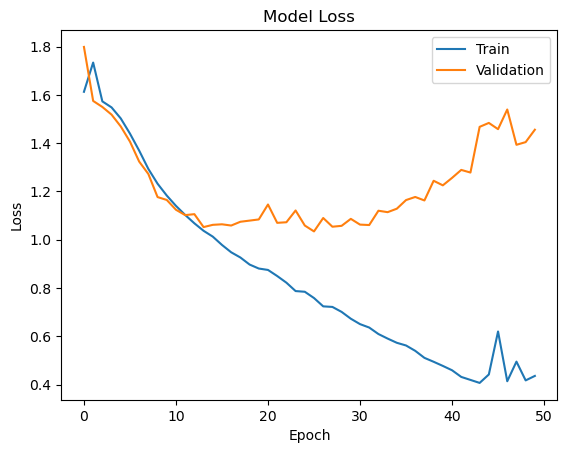

In [23]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [24]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 44ms/step - loss: 1.4558 - accuracy: 0.6000


[1.4558289051055908, 0.6000000238418579]

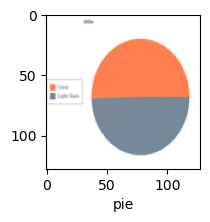

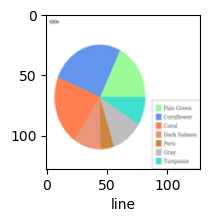

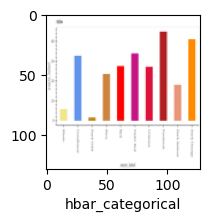

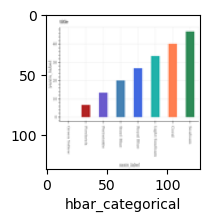

In [25]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [26]:
# Observation:  we can see some wrong predictions


In [27]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 73ms/step


array([[5.7545310e-01, 1.8486968e-01, 1.9801062e-01, 3.3008072e-03,
        3.8365815e-02],
       [1.9635597e-01, 2.2318612e-03, 1.5992371e-04, 5.7693897e-03,
        7.9548287e-01],
       [1.5146182e-01, 2.2156769e-03, 2.2099097e-03, 2.9205659e-03,
        8.4119201e-01],
       [8.3434874e-01, 3.1119998e-05, 5.0102924e-05, 7.0094001e-03,
        1.5856065e-01],
       [6.3057250e-01, 8.5404865e-02, 2.5849673e-01, 2.0536494e-03,
        2.3472225e-02]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [29]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [30]:
# here we see some values are not matching


'dot_line'

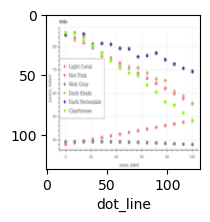

In [31]:
# test actual and predicted

# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
 

# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted

image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [32]:
# some values are not matching


In [33]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.46      0.59      0.52        37
           1       0.86      0.70      0.78        44
           2       0.77      0.35      0.49        48
           3       0.43      0.79      0.55        33
           4       0.73      0.63      0.68        38

    accuracy                           0.60       200
   macro avg       0.65      0.61      0.60       200
weighted avg       0.67      0.60      0.60       200



In [34]:
# Generate the confusion matrix 
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  3  0  5  7]
 [ 7 31  0  6  0]
 [ 9  1 17 21  0]
 [ 0  1  4 26  2]
 [10  0  1  3 24]]


Text(95.72222222222221, 0.5, 'Actual')

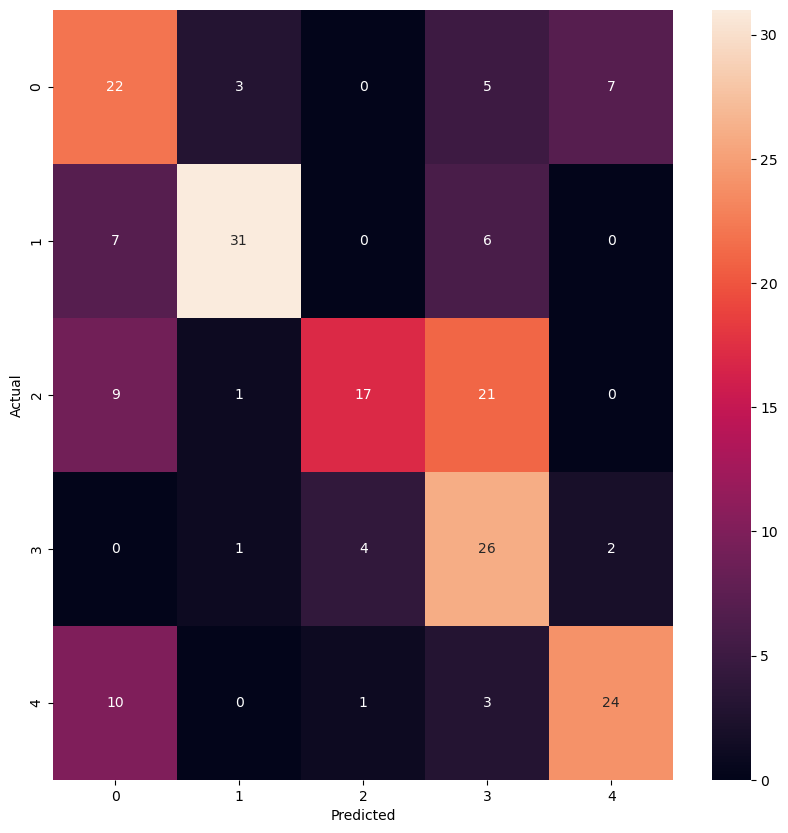

In [35]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [36]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error


In [79]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3), pooling='max')


In [80]:
# Freeze the weights of all layers except the new classification layer
for layer in vgg16_model.layers:
    layer.trainable = False


In [81]:
from keras.optimizers import Adam

# Replace the final classification layer with a new layer
x = vgg16_model.output
x = Flatten()(x)
# x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)

predictions = Dense(1, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [82]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])


In [83]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [84]:
# load training dataset in numpy array

images = []
labels = []

for filename in os.listdir(train_val_dir): 
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
        
#       img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')                  
y_train = np.load('y_train.npy')    

In [85]:
# Set up data generators for image augmentation and feeding data to the model
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [86]:
# load test dataset in numpy array

images = []
labels = []

for filename in os.listdir(test_dir): 
    if filename.endswith('.png'): 
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
#       img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')               
y_test = np.load('y_test.npy')    

In [87]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [88]:
# flow method generates batches of augmented data
train_generator =  train_datagen.flow(
    x_train, y_train, 
    batch_size=16)

val_generator = test_datagen.flow(
    x_val, y_val, 
    batch_size=16)
 
test_generator = test_datagen.flow(
    x_test, y_test, 
    batch_size=16)
    

In [89]:
# Train our model with early stopping

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=5, validation_data=val_generator, callbacks=[es])


Epoch 1/5
50/50 [==============================] - 78s 2s/step - loss: -341.3395 - accuracy: 0.0012 - val_loss: -593.7727 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: -870.4807 - accuracy: 0.0012 - val_loss: -1087.0160 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 [==============================] - 67s 1s/step - loss: -1334.1936 - accuracy: 0.0012 - val_loss: -1590.2766 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: -1868.2339 - accuracy: 0.0012 - val_loss: -2114.8362 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 [==============================] - 71s 1s/step - loss: -2412.6584 - accuracy: 0.0012 - val_loss: -2661.9409 - val_accuracy: 0.0000e+00


In [90]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[es])


Epoch 1/5
50/50 [==============================] - 60s 1s/step - loss: -2972.9106 - accuracy: 0.0012 - val_loss: -145.8647 - val_accuracy: 0.0200
Epoch 2/5
50/50 [==============================] - 59s 1s/step - loss: -3521.4602 - accuracy: 0.0012 - val_loss: -173.1744 - val_accuracy: 0.0200
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: -4093.0640 - accuracy: 0.0012 - val_loss: -201.5421 - val_accuracy: 0.0200
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: -4701.8066 - accuracy: 0.0012 - val_loss: -230.1756 - val_accuracy: 0.0200
Epoch 5/5
50/50 [==============================] - 64s 1s/step - loss: -5400.6426 - accuracy: 0.0012 - val_loss: -259.4231 - val_accuracy: 0.0200
